In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
def bit_reverse(n, bits):
    """Bit-reverses an integer n with the given bit length."""
    reversed_n = 0
    for i in range(bits):
        reversed_n = (reversed_n << 1) | (n & 1)
        n >>= 1
    return reversed_n

def fft_radix2_DIF(x):
    """Computes the FFT using the Cooley-Tukey Radix-2 DIF algorithm."""
    N = len(x)
    
    # 1. Check if N is a power of 2
    if N & (N - 1) != 0:  # Power of 2 check
        raise ValueError("Input size must be a power of 2.")
    
    # 2. Compute number of stages (log2(N))
    stages = int(np.log2(N))
    
    # 3. Bit-reversed order reordering
    reordered_x = np.array([x[bit_reverse(i, stages)] for i in range(N)], dtype=complex)

    # 4. Radix-2 FFT computation (DIF)
    for stage in range(stages):
        step_size = 2 ** (stage + 1)
        half_step = step_size // 2
        W_N = np.exp(-2j * np.pi / step_size)  # Twiddle factor base

        for k in range(0, N, step_size):
            for n in range(half_step):
                even_part = reordered_x[k + n]
                odd_part = reordered_x[k + n + half_step] * W_N ** n
                reordered_x[k + n] = even_part + odd_part
                reordered_x[k + n + half_step] = even_part - odd_part
    
    return reordered_x


In [10]:
# Test with a simple input
N = 8  # Must be a power of 2
x = np.array([1, 2, 3, 4, 2, 1, 0, -1], dtype=complex)  # Example input signal
X_fft = fft_radix2_DIF(x)

print("FFT Output:", X_fft)

FFT Output: [12.        +0.j         -3.82842712-7.24264069j  0.        +0.j
  1.82842712-1.24264069j  0.        +0.j          1.82842712+1.24264069j
  0.        +0.j         -3.82842712+7.24264069j]


In [11]:
X_numpy = np.fft.fft(x)
print("NumPy FFT Output:", X_numpy)

NumPy FFT Output: [12.        +0.j         -3.82842712-7.24264069j  0.        +0.j
  1.82842712-1.24264069j  0.        +0.j          1.82842712+1.24264069j
  0.        +0.j         -3.82842712+7.24264069j]


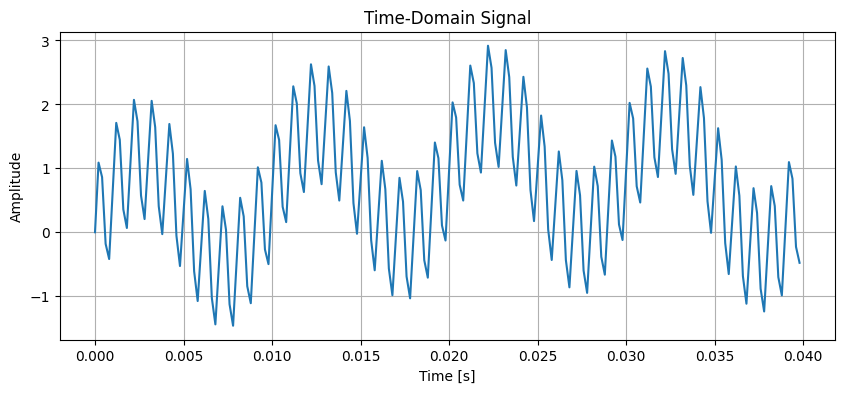

In [12]:
# Parameters
fs = 5000  # Sampling frequency in Hz
N = 1024   # Number of samples
t = np.arange(N) / fs  # Time vector

# Composite signal: sum of 10Hz, 100Hz, and 1000Hz sinusoids
signal = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 100 * t) + np.sin(2 * np.pi * 1000 * t)

# Plot the time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(t[:200], signal[:200], color='C0')  # Show first 200 samples
plt.title("Time-Domain Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

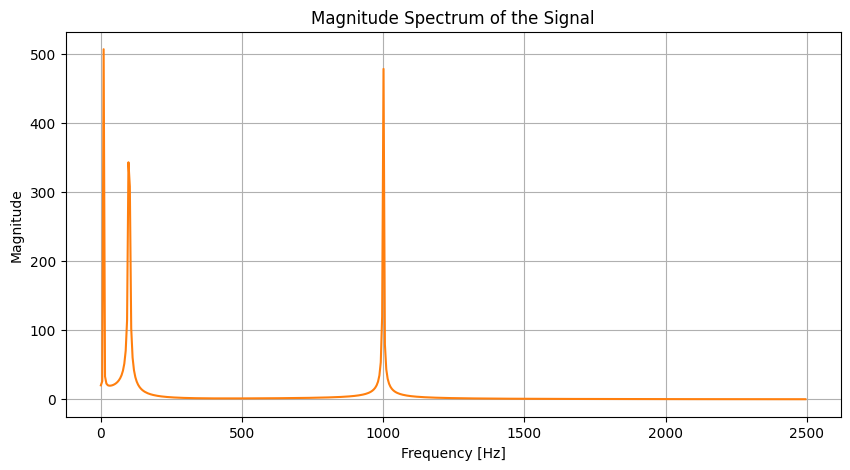

In [13]:
# Compute FFT
def fft_iterative(signal):
    return fft_radix2_DIF(signal)

X_fft = fft_iterative(signal)

# Compute magnitude spectrum
magnitude = np.abs(X_fft)
frequencies = np.fft.fftfreq(N, 1/fs)

# Plot magnitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:N//2], magnitude[:N//2], color='C1')
plt.title("Magnitude Spectrum of the Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

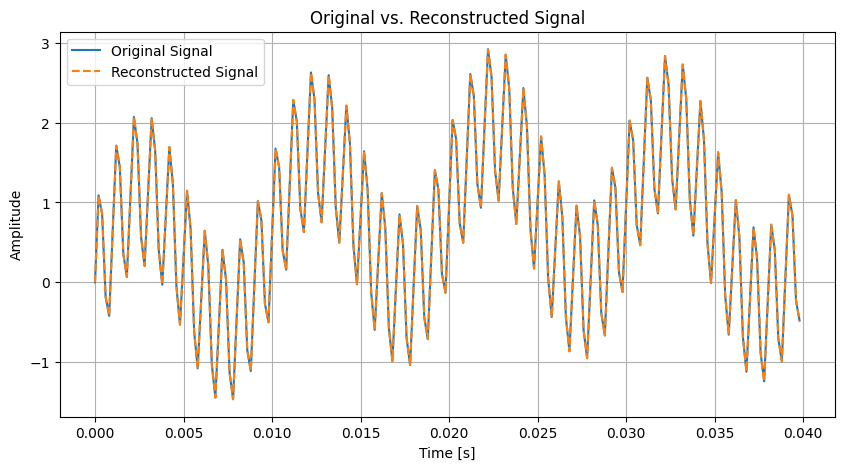

In [14]:
def ifft_iterative(X):
    """Compute the Inverse FFT using the iterative Cooley-Tukey algorithm."""
    N = len(X)
    
    # Take the complex conjugate
    X_conjugate = np.conj(X)
    
    # Compute FFT on conjugated spectrum
    x_time = fft_iterative(X_conjugate)
    
    # Take the conjugate again and scale by 1/N
    return np.real(np.conj(x_time) / N)

# Compute Inverse FFT
signal_reconstructed = ifft_iterative(X_fft)

# Compare Original and Reconstructed Signal
plt.figure(figsize=(10, 5))
plt.plot(t[:200], signal[:200], label="Original Signal", color='C0')
plt.plot(t[:200], signal_reconstructed[:200], linestyle="dashed", label="Reconstructed Signal", color='C1')
plt.title("Original vs. Reconstructed Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


In [15]:
from scipy.fft import fft, ifft

# Compute FFT and iFFT using SciPy
X_scipy = fft(signal)
signal_scipy_reconstructed = ifft(X_scipy)

# Compare FFT results
fft_difference = np.abs(X_fft - X_scipy).max()
ifft_difference = np.abs(signal_reconstructed - signal_scipy_reconstructed).max()

print(f"Max FFT Difference: {fft_difference:.6e}")
print(f"Max iFFT Difference: {ifft_difference:.6e}")


Max FFT Difference: 5.179072e-12
Max iFFT Difference: 5.950896e-14
